In [1]:
import numpy as np
import pints
import pints.plot
import pints_smol_moments_3_normalised_jit_surface_area_pro as toy
import matplotlib.pyplot as plt
from scipy.stats import moment
import pandas as pd



Select the desired model, true parameters and time array.

Then simulate to get synthetic data

In [2]:

model = toy.SmolModel(None,None)


true_parameters = [0.0003, 0.01, 900]


times = np.linspace(20, 90, 71)

df = pd.read_csv('2017-03-16_inference_input_multi_well_t_20.csv', header=None)
org_values = np.transpose(df.to_numpy())
org_values = org_values[:71,:]


# 1st moment is mean, 1st centred moment should be array 6
centred_moment_1 = moment(org_values, moment=1, axis=1)
centred_moment_2 = moment(org_values, moment=2, axis=1)
centred_moment_3 = moment(org_values, moment=3, axis=1)

# Out array, mean, variance then centred standardised moments (aka skewness, kurtosis, hyperskewness)
st_dev = np.sqrt(centred_moment_2)
out_array = np.zeros((71,3))
out_array[:,0] = np.mean(org_values,axis=1)
out_array[:,1] = centred_moment_2
out_array[:,2] = np.divide(centred_moment_3,st_dev*st_dev*st_dev)

# print(st_dev)

# print(np.mean(org_values, axis=1))
# print(centred_moment_3)



Add noise to the data (using random sampling from normal distribution)

In [3]:
size_noise = 3
noise_value = 1
# # Create a list with the specified size filled with a placeholder value
noise_arr = [noise_value for _ in range(size_noise)]

Set-up pints problem and log likelihoods

In [4]:

# problem = pints.MultiOutputProblem(model, times, centred_moments)
problem = pints.MultiOutputProblem(model, times, out_array)

log_likelihood = pints.GaussianLogLikelihood(problem)
# log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)

print('Original problem dimension: ' + str(problem.n_parameters()))
print('New dimension: ' + str(log_likelihood.n_parameters()))
# print('New dimension: ' + str(log_likelihood_2.n_parameters()))

true_parameters += noise_arr
# print(true_parameters)



Original problem dimension: 3
New dimension: 6


Create uniform log prior

In [5]:

# Define the size of the list
size = 6
placeholder_lower_value = 0
placeholder_upper_value = 100
 
# Create a list with the specified size filled with a placeholder value
prior_arr_lower = [placeholder_lower_value for _ in range(size)]
prior_arr_upper = [placeholder_upper_value for _ in range(size)]
prior_arr_lower[0] = 0.00001
prior_arr_upper[0] = 0.001
prior_arr_lower[1] = 0.00001
prior_arr_upper[1] = 0.1
prior_arr_lower[2] = 1
prior_arr_upper[2] = 4000


log_prior = pints.UniformLogPrior(
    prior_arr_lower,
    prior_arr_upper
    )

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_24339/1463277306.py:17: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


In [6]:

xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 1000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains = mcmc.run()
print(chains)



Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.7
1     411     0:21.6
2     810     0:28.8
3     1212    0:37.1
20    6744    0:53.8
40    11415   1:06.3
60    15738   1:17.1
80    20097   1:27.5
100   24312   1:36.9
120   28542   1:46.9
140   32721   1:56.4
160   37032   2:06.2
180   41250   2:16.1
200   45654   2:26.1
220   49965   2:36.8
240   54477   2:50.1
260   58794   2:59.8
280   63024   3:09.4
300   67302   3:19.1
320   71565   3:29.6
340   76134   3:40.2
360   80052   3:49.3
380   84291   3:59.3
400   88680   4:13.9
420   92799   4:25.1
440   97002   4:34.5
460   101130   4:44.4
480   105471   4:54.1
500   109809   5:05.6
520   114168   5:15.3
540   118401   5:25.2
560   122646   5:34.5
580   126921   5:44.4
600   131127   5:53.6
620   135552   6:05.6
640   139662   6:18.3
 lsoda--  at t(=r1) and step size h(=r2), the error  
       test failed repeatedly or with abs(h) = hmin  
      in above,  r1 =  0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Repeated error test failures (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


 lsoda--  at t(=r1) and step size h(=r2), the error  
       test failed repeatedly or with abs(h) = hmin  
      in above,  r1 =  0.8484268583062D+02   r2 =  0.2205799498329D-13
660   144096   6:32.2
680   148491   6:42.2
700   152907   6:52.1
720   157158   7:01.7
740   161436   7:11.4
760   165501   7:22.6
780   169839   7:32.5
800   174093   7:42.2
820   178572   7:52.4
840   182955   8:03.6
860   187212   8:13.4
880   191619   8:23.6
900   195864   8:36.1
 lsoda--  at t(=r1) and step size h(=r2), the error  
       test failed repeatedly or with abs(h) = hmin  
      in above,  r1 =  0.4659637755147D+02   r2 =  0.2924077226847D-10
920   200109   8:50.3
940   204354   9:00.9
960   208677   9:11.7
980   213030   9:22.9
1000  215099   9:28.2
Halting: Maximum number of iterations (1000) reached.
[[[2.70000000e-04 9.00000000e-03 8.10000000e+02 9.00000000e-01
   9.00000000e-01 9.00000000e-01]
  [2.58871815e-04 1.75292079e-03 3.06020603e+03 1.20516037e+01
   7.34503214e+01 1.57228043e+01

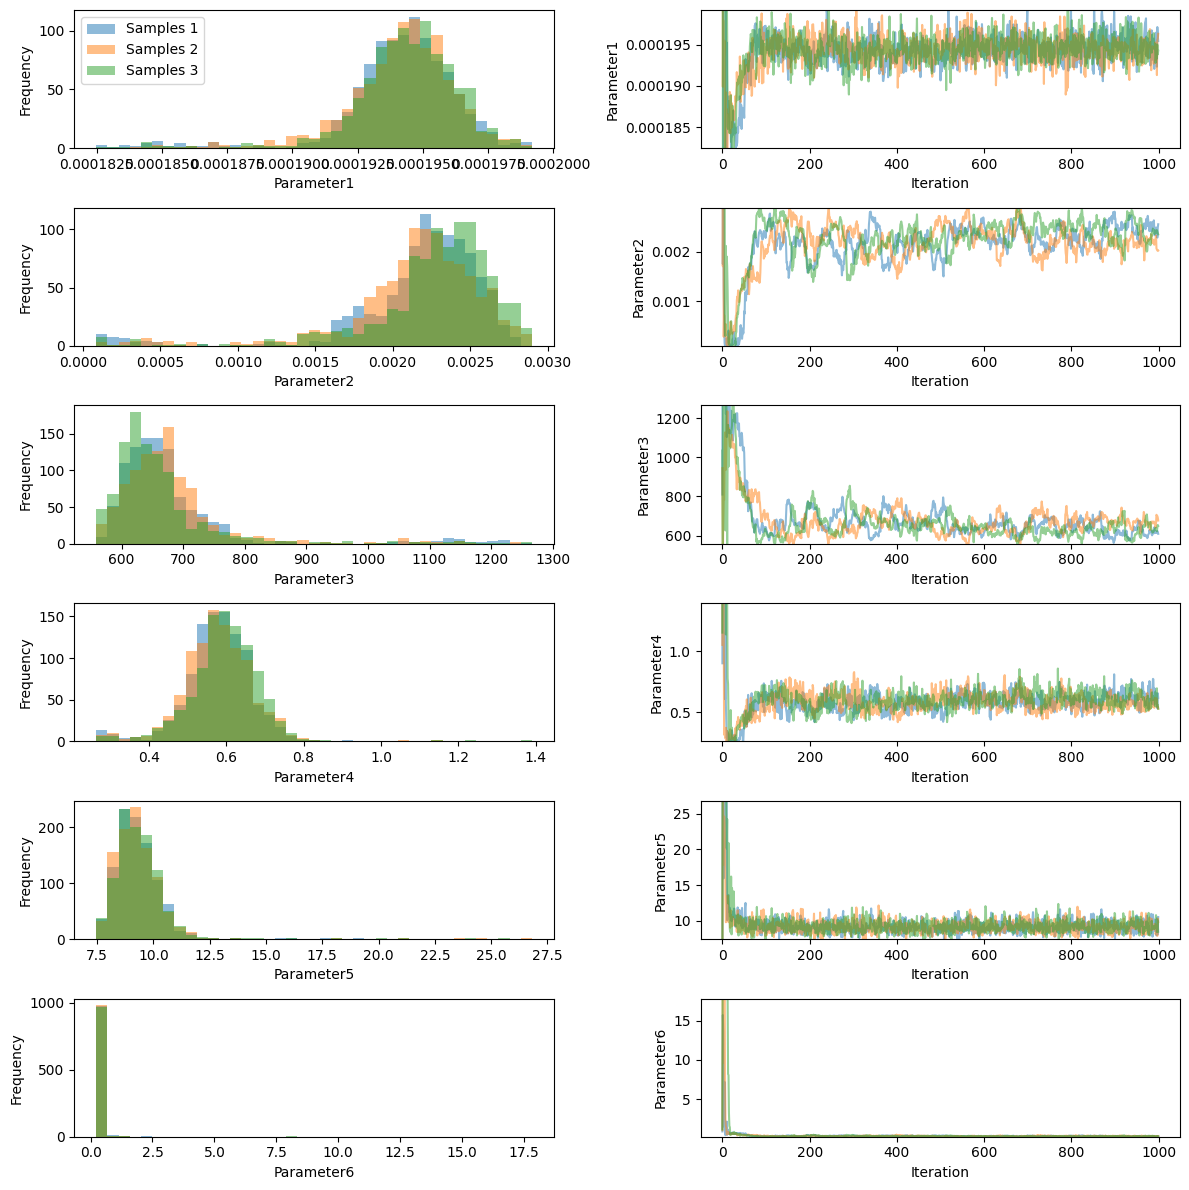

In [7]:

pints.plot.trace(chains, n_percentiles=99)
plt.savefig("mcmc.png")
plt.show()


In [8]:

# ITERS = 100
AllChains = chains[0,100:10000,:]
# np.asarray(AllChains)
print(np.shape(AllChains))
print(AllChains[0])
print(AllChains)


(900, 6)
[1.96376533e-04 2.42974502e-03 6.40531021e+02 6.67847478e-01
 9.35024267e+00 2.99578027e-01]
[[1.96376533e-04 2.42974502e-03 6.40531021e+02 6.67847478e-01
  9.35024267e+00 2.99578027e-01]
 [1.96135654e-04 2.40795959e-03 6.22211530e+02 6.49733895e-01
  8.26887026e+00 2.62434420e-01]
 [1.94333604e-04 2.42108113e-03 6.21067574e+02 6.03241457e-01
  1.02619510e+01 2.69833343e-01]
 ...
 [1.97124426e-04 2.29157962e-03 6.22711776e+02 5.33601333e-01
  1.04230700e+01 2.86573500e-01]
 [1.96063134e-04 2.49435713e-03 6.18826515e+02 6.55342277e-01
  8.12759930e+00 3.15056491e-01]
 [1.95446269e-04 2.56264520e-03 6.08816838e+02 6.18093813e-01
  1.05307285e+01 2.48497105e-01]]


In [9]:

for I in range(3-1):
    AllChains_add = chains[I+1,100:10000,:]
    AllChains = np.concatenate((AllChains,AllChains_add), axis=0)


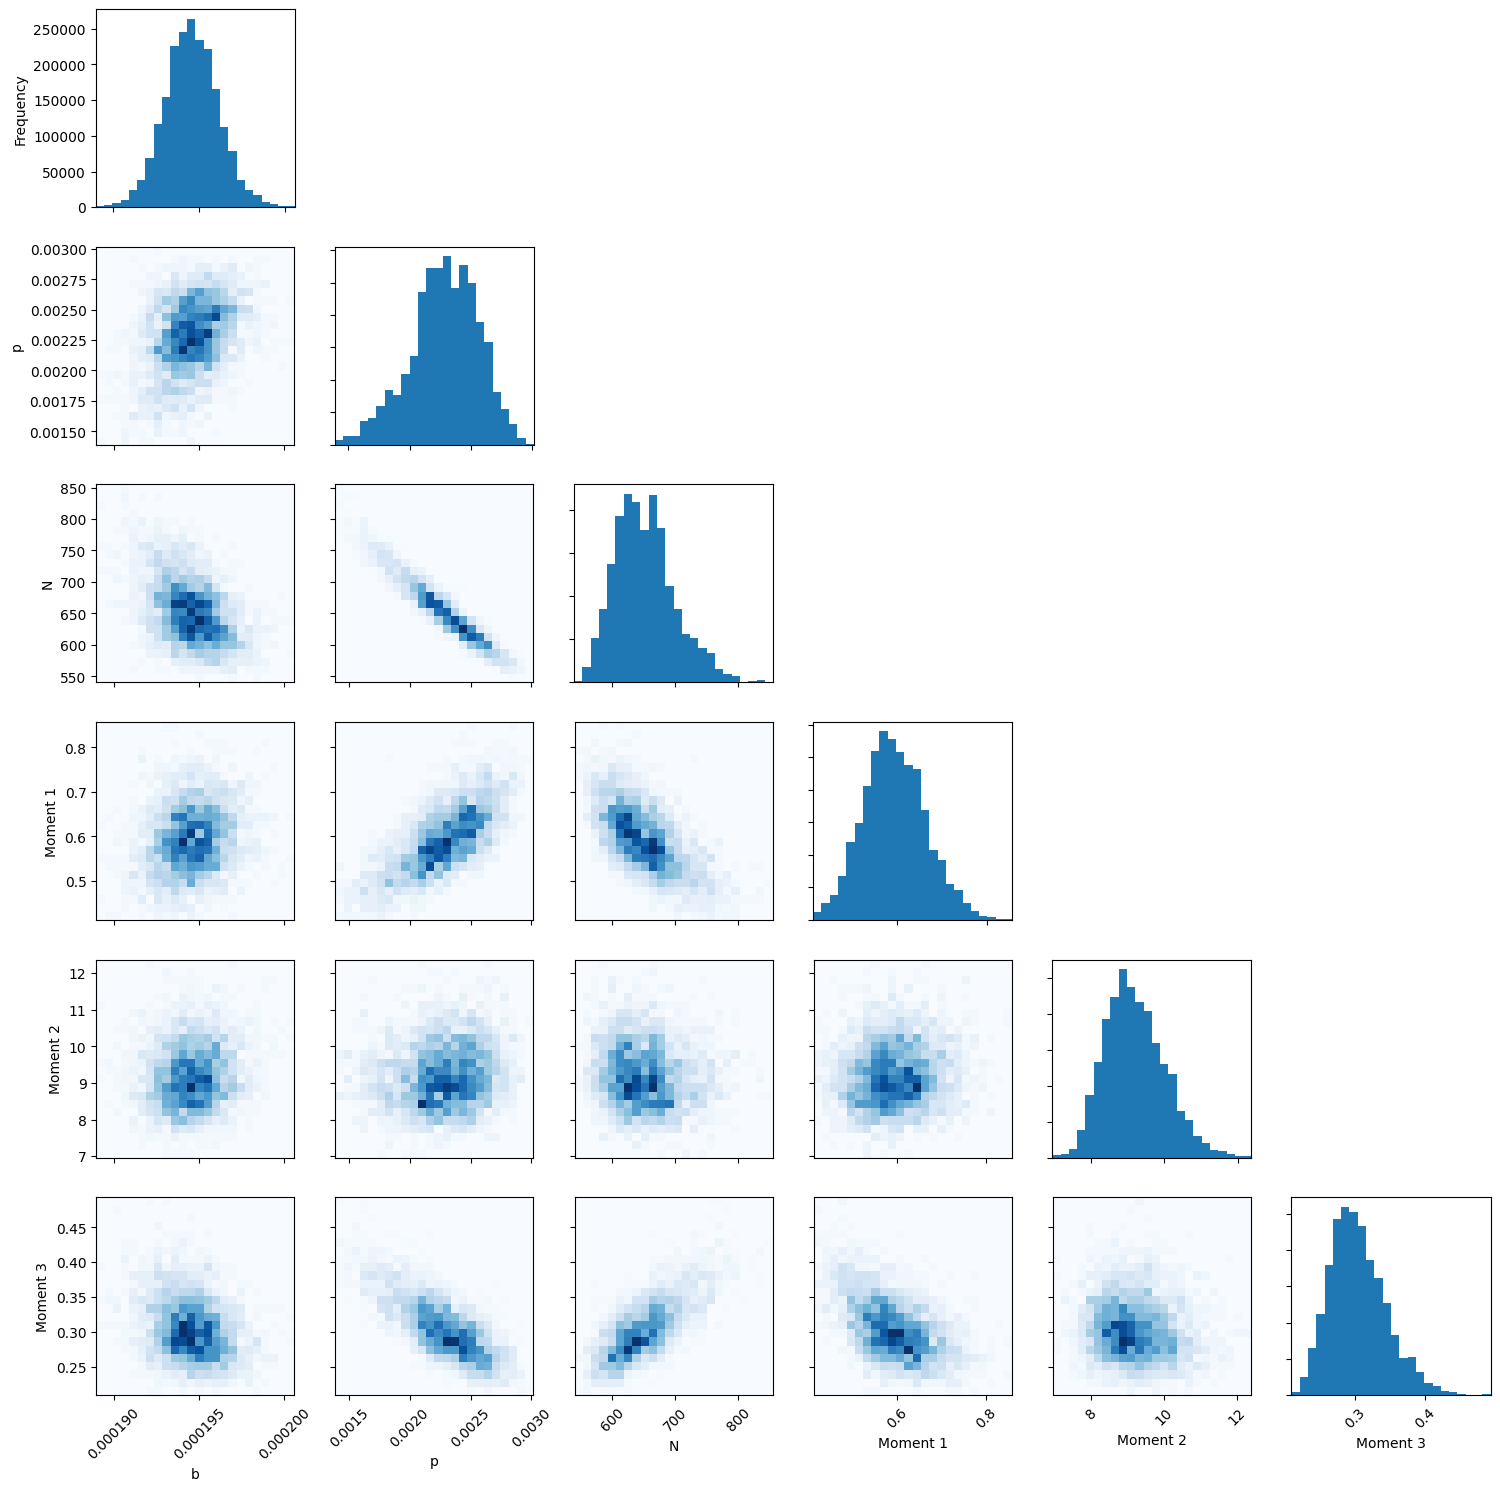

In [11]:


parameter_names = ["b","p", "N", "Moment 1", "Moment 2", "Moment 3"]
#pints.plot.pairwise(chains, kde=True, parameter_names=parameter_names)

pints.plot.pairwise(AllChains, heatmap=True, 
                    parameter_names=["b","p", "N", "Moment 1", "Moment 2", "Moment 3"])
plt.show()

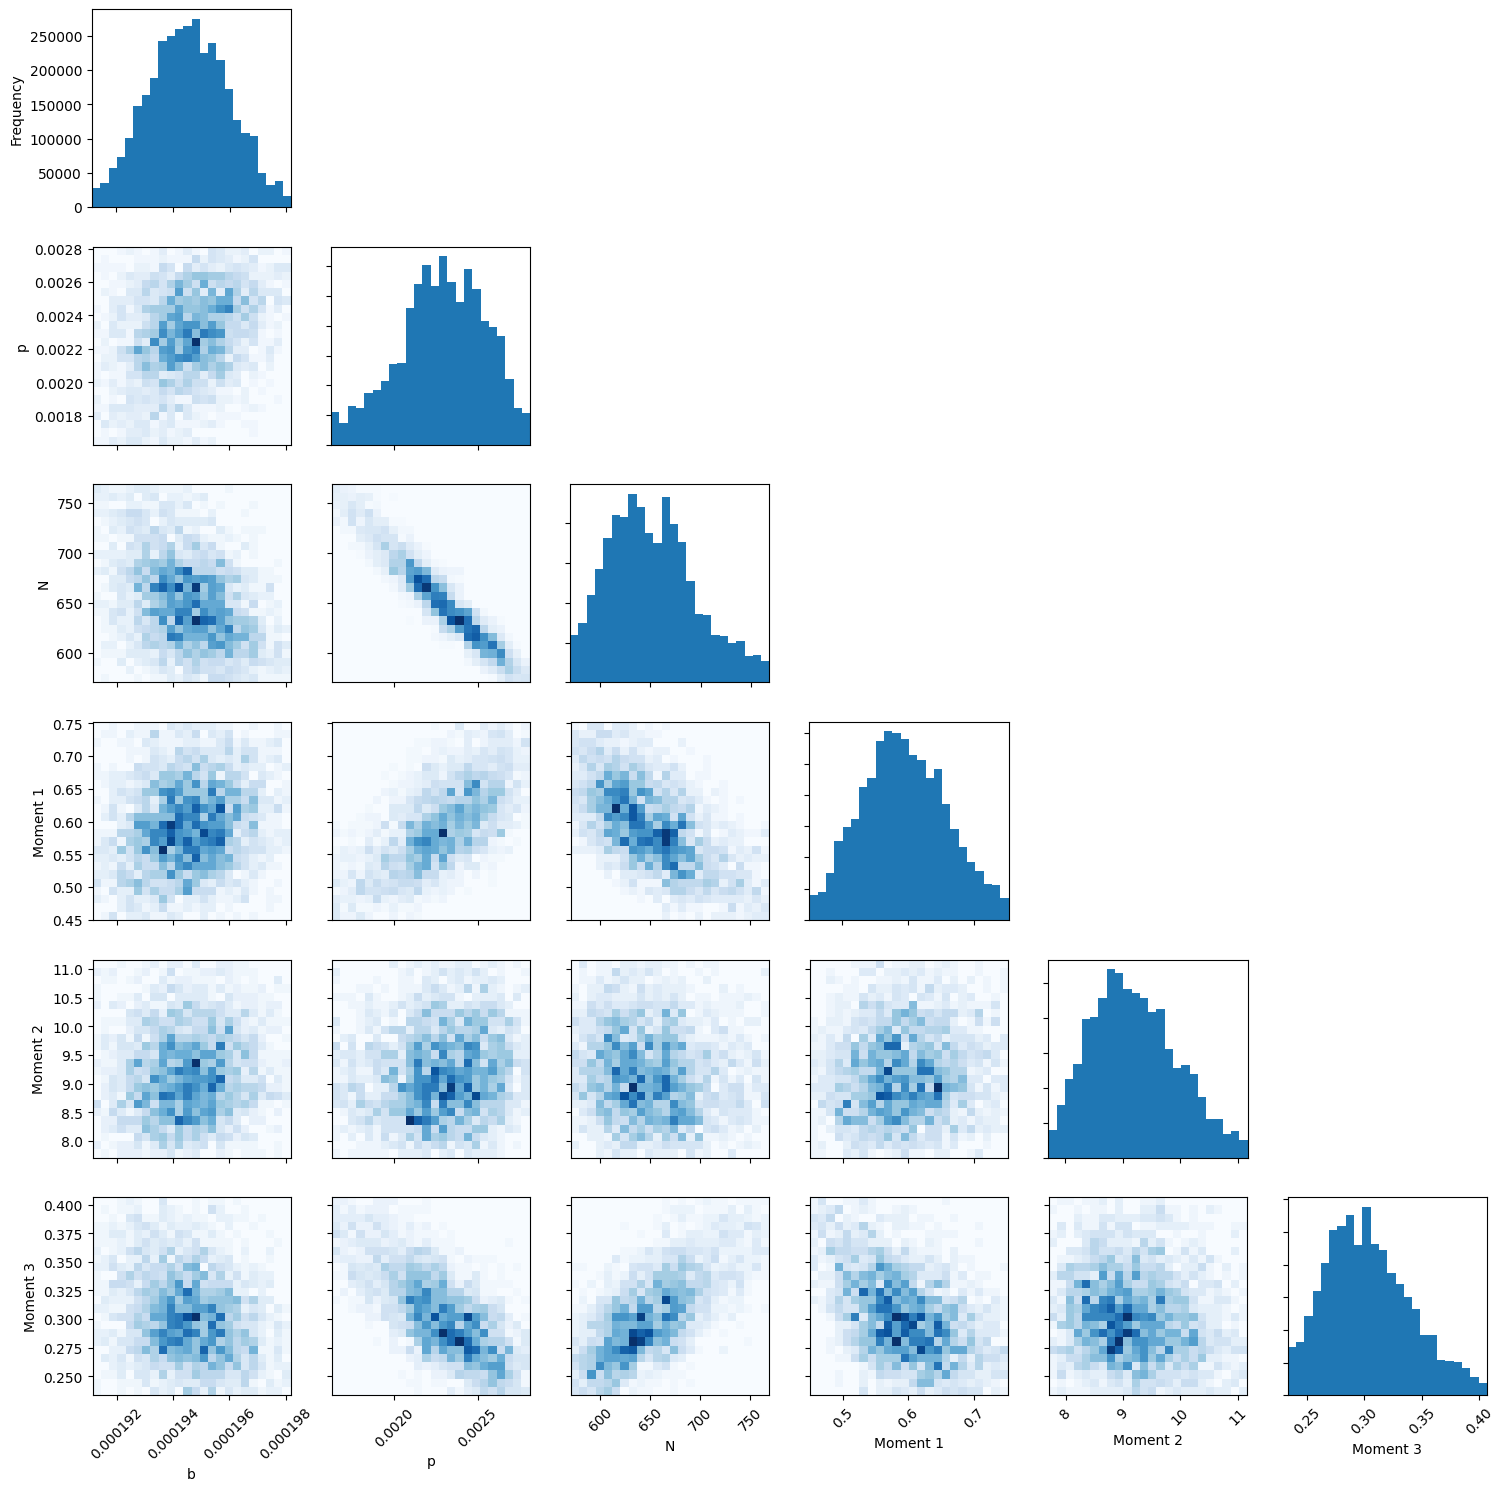

In [12]:
parameter_names = ["b","p","N", "Moment 1", "Moment 2", "Moment 3"]
#pints.plot.pairwise(chains, kde=True, parameter_names=parameter_names)

pints.plot.pairwise(AllChains, heatmap=True, 
                    parameter_names=["b","p","N", "Moment 1", "Moment 2", "Moment 3"],
                    n_percentiles=97)
                    
plt.show()

In [13]:
parameter_names = ["b","p","N", "Moment 1", "Moment 2", "Moment 3"]
results = pints.MCMCSummary(chains=chains[:,int(ITERS/2):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)


<class 'pints._mcmc._summary.MCMCSummary'>
param     mean    std.    2.5%    25%     50%     75%     97.5%    rhat    ess     ess per sec.
--------  ------  ------  ------  ------  ------  ------  -------  ------  ------  --------------
b         0.00    0.00    0.00    0.00    0.00    0.00    0.00     1.01    371.98  0.65
p         0.00    0.00    0.00    0.00    0.00    0.00    0.00     1.09    77.50   0.14
N         641.87  39.43   573.27  613.15  637.87  668.55  725.93   1.09    79.13   0.14
Moment 1  0.61    0.07    0.49    0.56    0.60    0.65    0.74     1.04    159.89  0.28
Moment 2  9.23    0.81    7.86    8.64    9.15    9.75    11.00    1.00    438.53  0.77
Moment 3  0.30    0.03    0.24    0.27    0.29    0.32    0.37     1.04    138.67  0.24


In [14]:
from tabulate import tabulate
class MyMCMCSummary(pints.MCMCSummary):
    def __str__(self):
        """
        Prints posterior summaries for all parameters to the console, including
        the parameter name, posterior mean, posterior std deviation, the
        2.5%, 25%, 50%, 75% and 97.5% posterior quantiles, rhat, effective
        sample size (ess) and ess per second of run time.
        """
        if self._summary_str is None:
            headers = [
                'param', 'mean', 'std.',
                '2.5%', '25%', '50%', '75%', '97.5%',
                'rhat', 'ess']
            if self._time is not None:
                headers.append('ess per sec.')

            self._summary_str = tabulate(
                self._summary_list,
                headers=headers,
                numalign='left',
                floatfmt='.3g',
            )

        return self._summary_str
    


In [15]:

parameter_names = ["b","p","N", "Moment 1", "Moment 2", "Moment 3"]
results = MyMCMCSummary(chains=chains[:,int(ITERS/2):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)

<class '__main__.MyMCMCSummary'>
param     mean      std.      2.5%      25%       50%       75%       97.5%     rhat    ess    ess per sec.
--------  --------  --------  --------  --------  --------  --------  --------  ------  -----  --------------
b         0.000195  1.55e-06  0.000192  0.000194  0.000195  0.000196  0.000198  1.01    372    0.655
p         0.00234   0.000239  0.00183   0.00219   0.00235   0.00251   0.00279   1.09    77.5   0.136
N         642       39.4      573       613       638       669       726       1.09    79.1   0.139
Moment 1  0.605     0.066     0.489     0.559     0.601     0.648     0.743     1.04    160    0.281
Moment 2  9.23      0.808     7.86      8.64      9.15      9.75      11        1       439    0.772
Moment 3  0.296     0.0346    0.235     0.272     0.294     0.318     0.371     1.04    139    0.244


In [16]:
import math
print(math.log(4))
results.mean()

print(len(results.mean()))

AIC = 2*len(results.mean()) - 2*log_likelihood(results.mean())

print(AIC)


BIC = len(results.mean())*math.log(4) - 2*log_likelihood(results.mean())

print(BIC)

1.3862943611198906
6
676.9716939472734
673.2894601139927


In [ ]:
shape_chains = np.shape(AllChains)

DIC_1 = 0
for i in range(shape_chains[0]):
    thetas = AllChains[i,:]
    DIC_1 += -2*log_likelihood(thetas)

DIC_1 = DIC_1/shape_chains[0]

DIC_2 = -2*log_likelihood(results.mean())

DIC = 2*DIC_1 - DIC_2

print(DIC)

1035.2115955430431


In [ ]:
import scipy as spy

KS_test_array = []
for i in range(71):
    KS_test = spy.stats.kstest(result_interested[i,:], org_values[i,:])
    KS_test_array = np.append(KS_test_array, KS_test.statistic)

plt.plot(KS_test_array)

NameError: name 'result_interested' is not defined

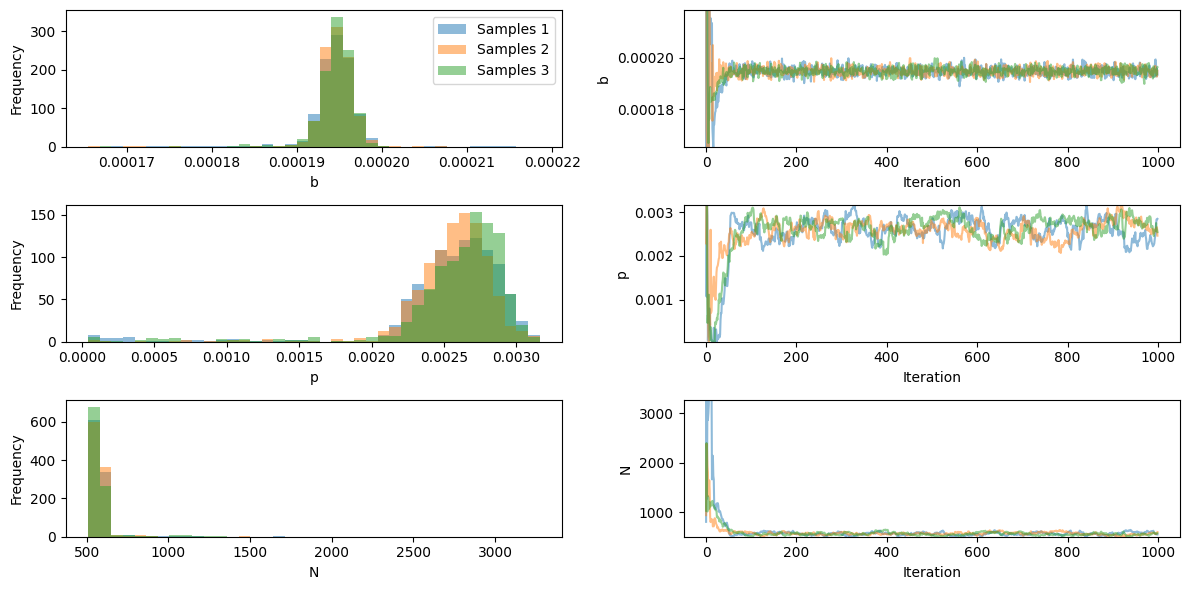

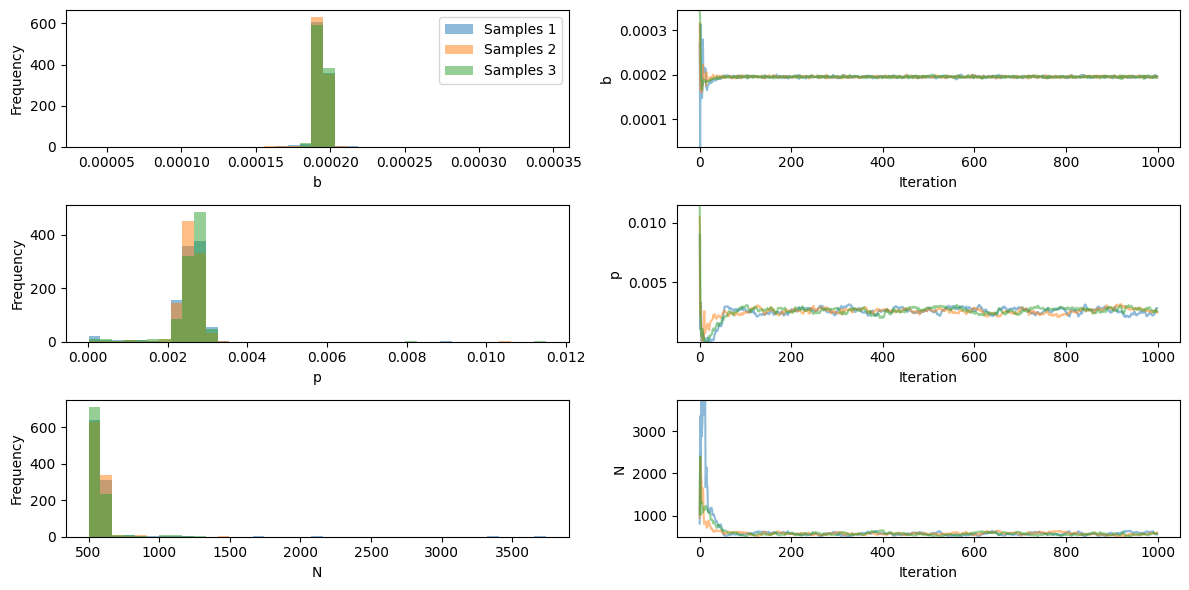

In [ ]:
pints.plot.trace(chains[:,:,[0,1,2]], n_percentiles=99.5, parameter_names=["b","p","N"])
plt.savefig("pints_out_extremes_removed.png", dpi=300)
plt.show()
pints.plot.trace(chains[:,:,[0,1,2]], parameter_names=["b","p","N"])
plt.savefig("pints_out.png", dpi=300)
plt.show()